In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
display(train.head())

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values in train:\n", missing)

Missing values in train:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


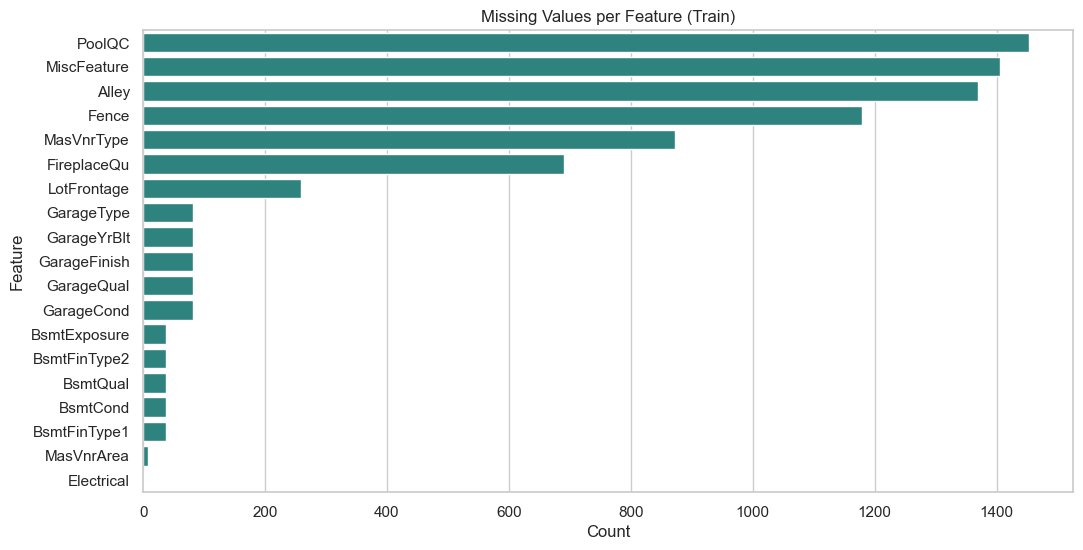

In [19]:
missing_df = pd.DataFrame({
    'feature': missing.index,
    'count': missing.values,
    'group': 'all'  # dummy column to use as hue
})
ax = sns.barplot(data=missing_df, x='count', y='feature', hue='group', palette='viridis')
ax.legend_.remove()  
plt.title("Missing Values per Feature (Train)")
plt.xlabel("Count")
plt.ylabel("Feature")
plt.show()


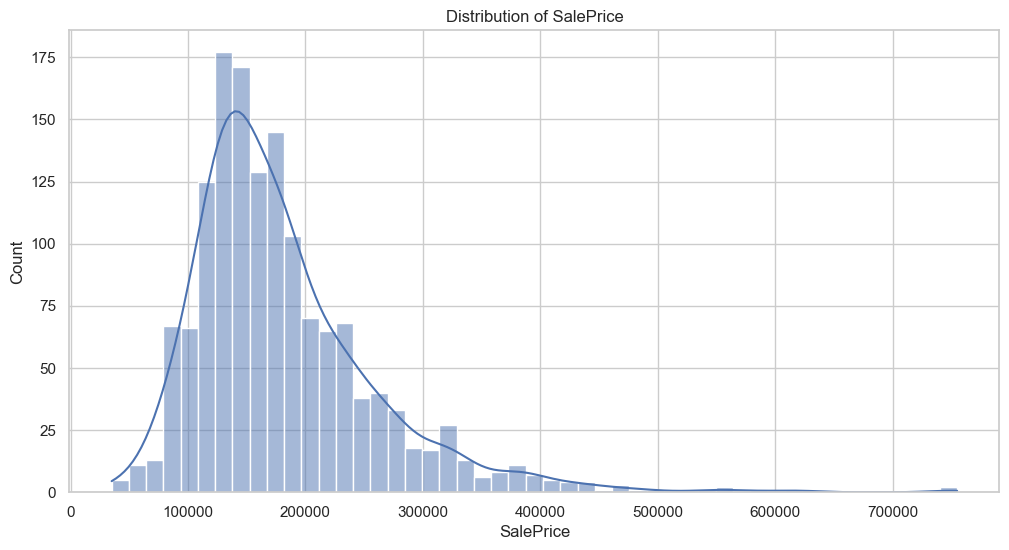

In [20]:
# Target variable analysis
sns.histplot(train['SalePrice'], kde=True, color='b')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.show()

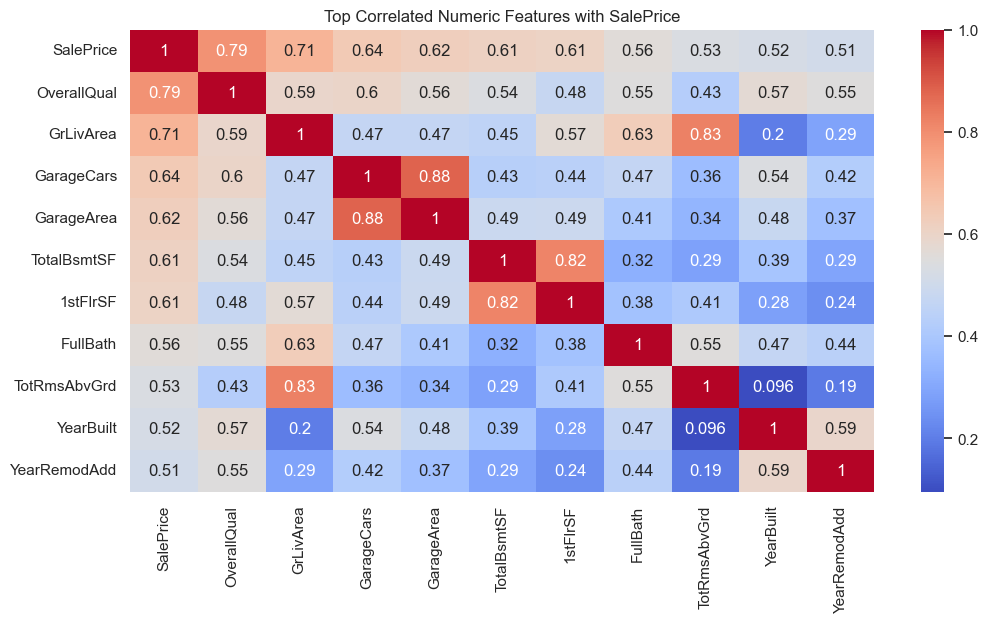

In [22]:
# Get only numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Compute correlation only on numeric columns
corr = train[numeric_cols].corr()

# Top 10 features most correlated with SalePrice
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index

sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Numeric Features with SalePrice")
plt.show()

In [23]:
# Example: Apply one-hot encoding to all categorical columns
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

# Align train and test columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

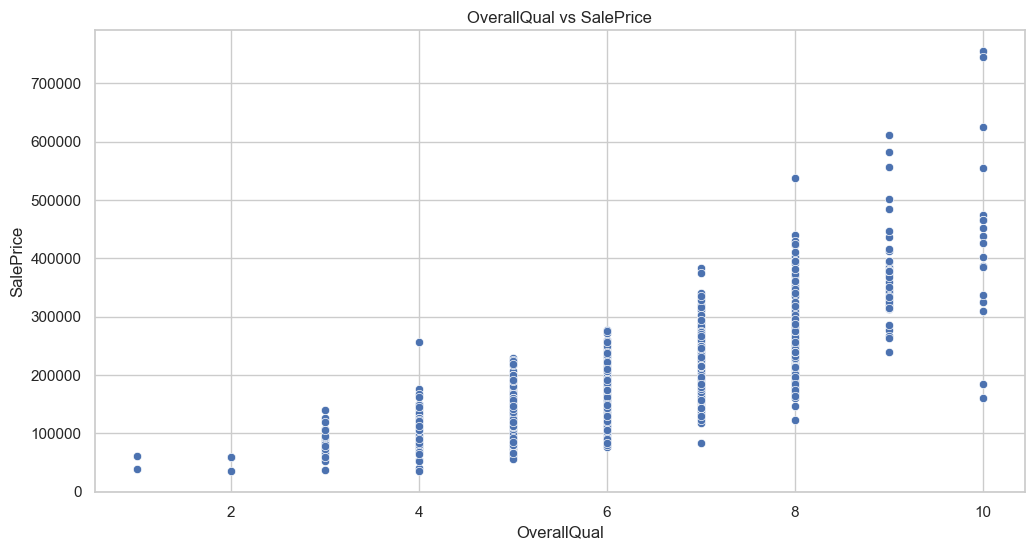

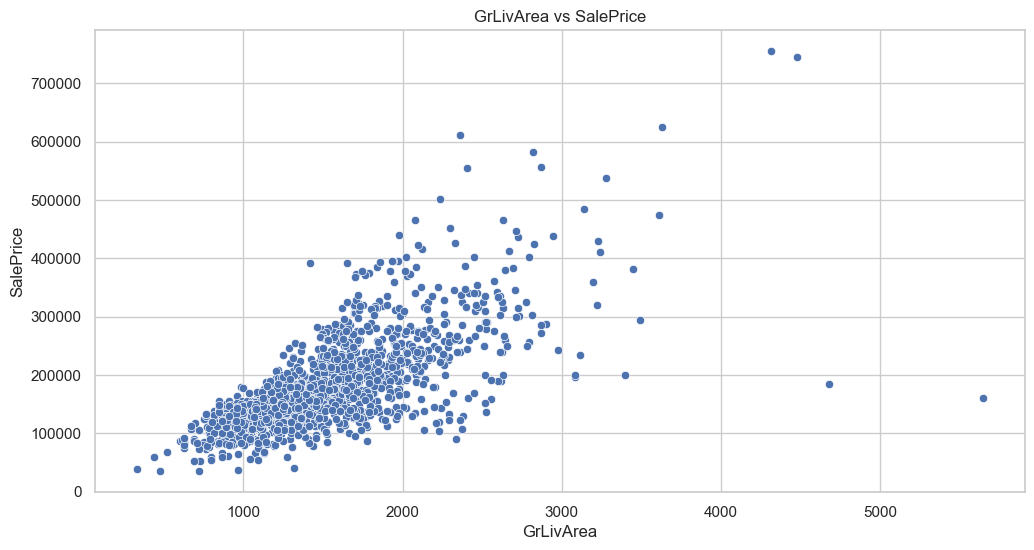

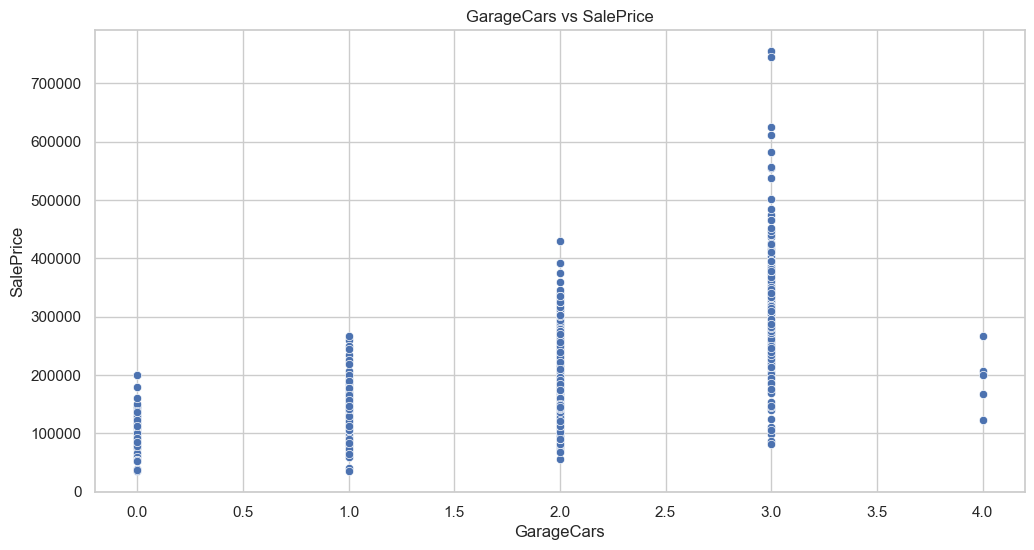

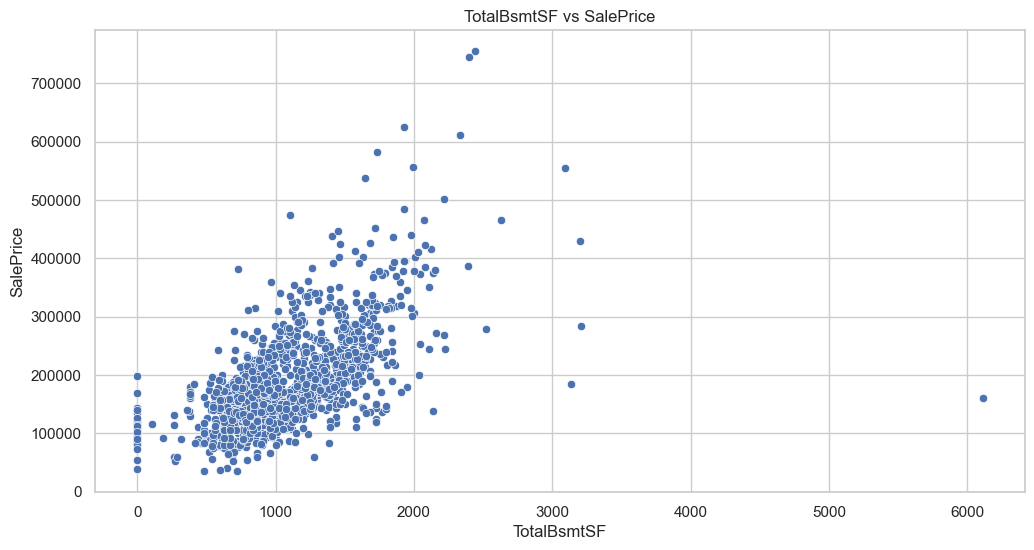

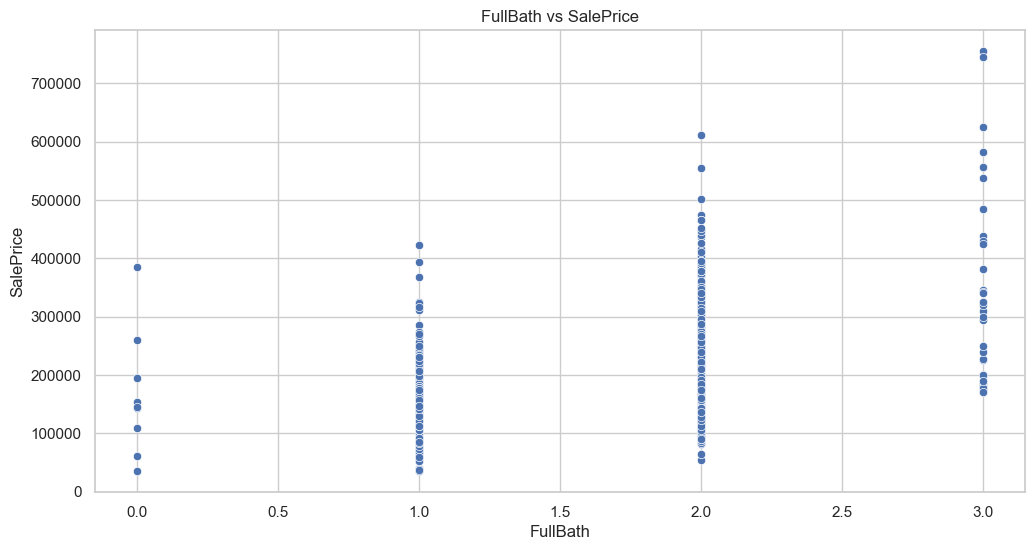

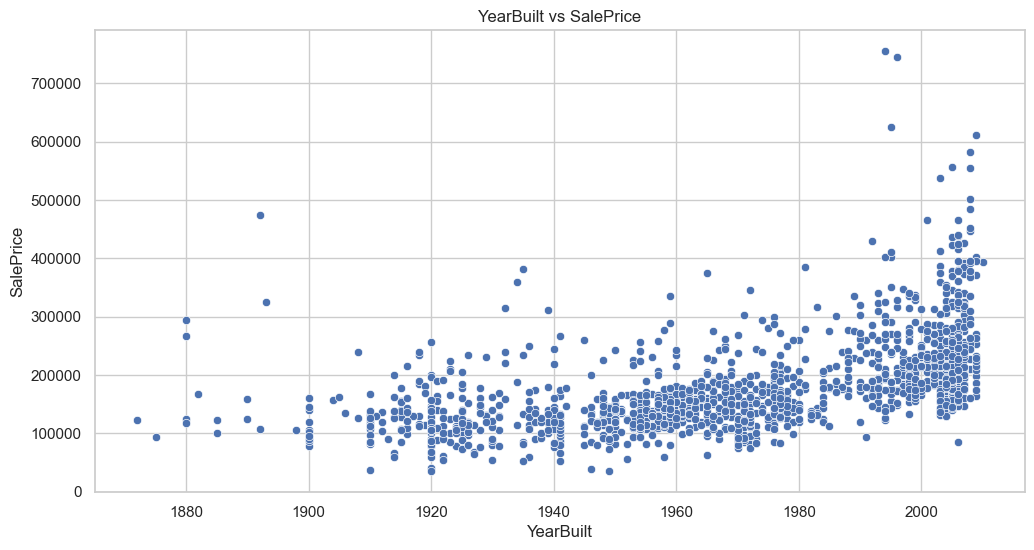

In [25]:
# Visualize relationship with SalePrice for top features
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for feature in top_features:
    if train[feature].dtype == 'object':
        sns.boxplot(x=feature, y='SalePrice', data=train)
    else:
        sns.scatterplot(x=feature, y='SalePrice', data=train)
    plt.title(f"{feature} vs SalePrice")
    plt.show()

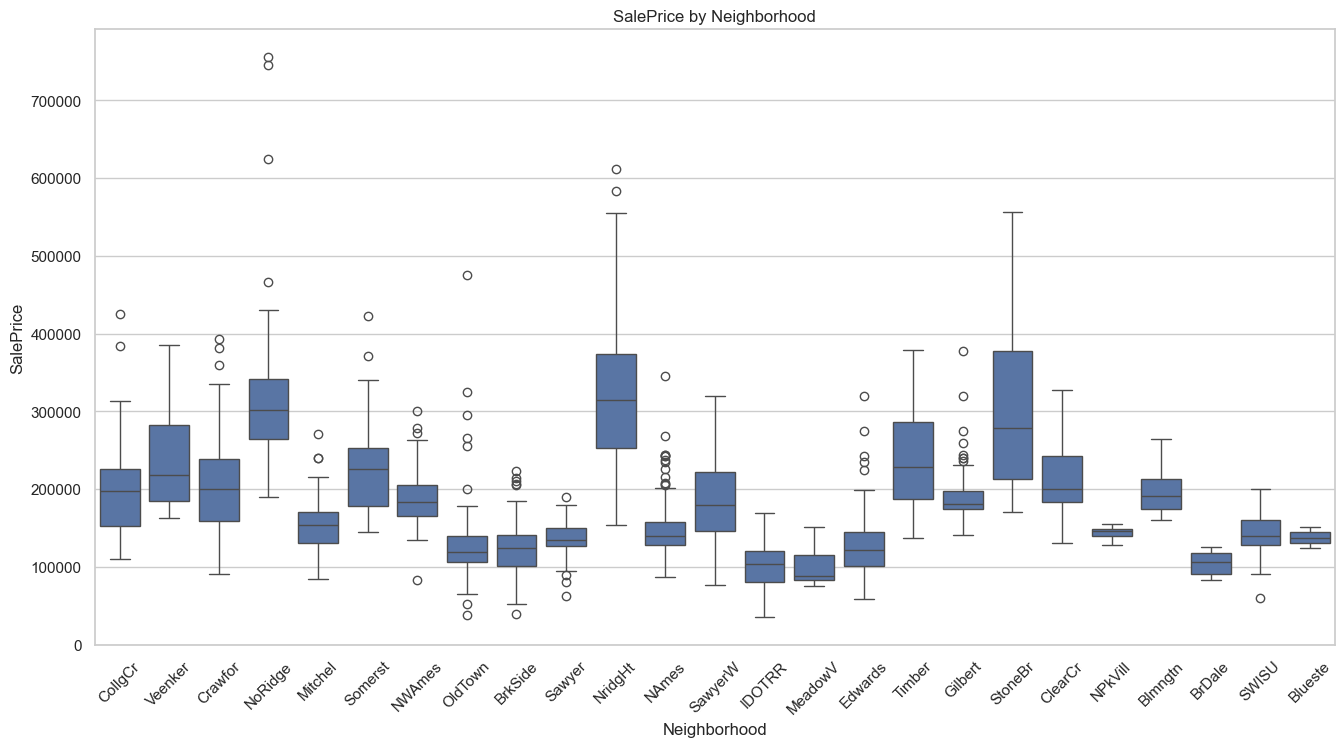

In [26]:
# Categorical feature distribution (example: Neighborhood)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title("SalePrice by Neighborhood")
plt.show()

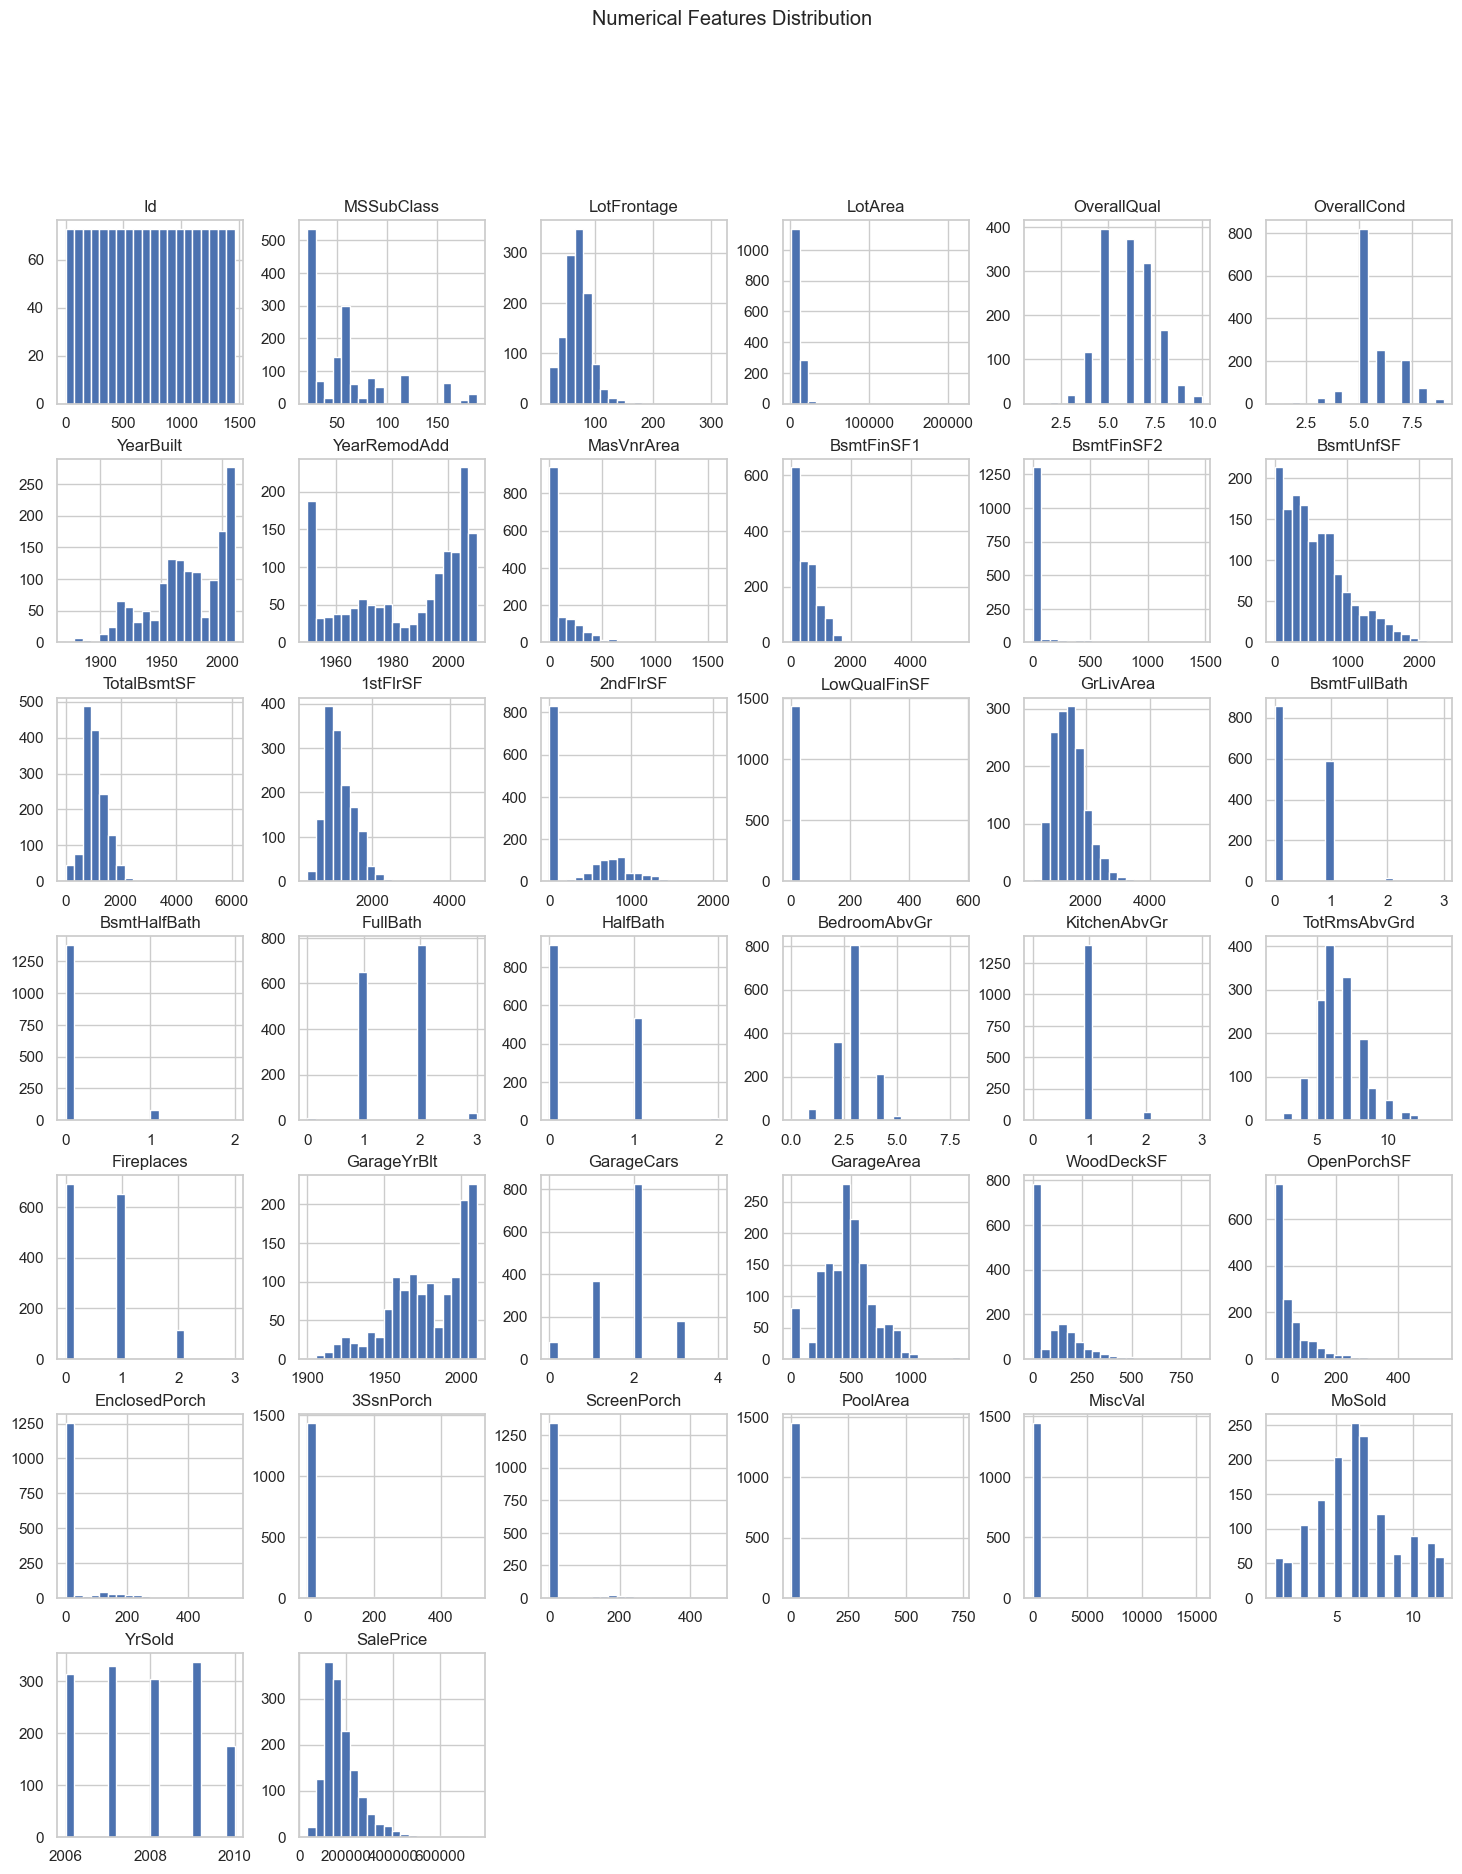

In [27]:
import math

num_features = train.select_dtypes(include=[np.number]).columns.tolist()
n_features = len(num_features)
cols = 6
rows = math.ceil(n_features / cols)

train[num_features].hist(bins=20, figsize=(18, rows * 3), layout=(rows, cols))
plt.suptitle("Numerical Features Distribution")
plt.show()

In [28]:
# Drop the columns containing null values
train = train.loc[:,train.isnull().sum() == 0]
test = test.loc[:,train.columns.drop(['SalePrice'])]
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
# Select only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train.select_dtypes(include=numerics)
test = test.select_dtypes(include=numerics)
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [30]:
# Drop the columns containing null values
train = train.loc[:,train.isnull().sum() == 0]
test = test.loc[:,train.columns.drop(['SalePrice'])]
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [33]:
# Split train -> train, validation
import sklearn
from sklearn.model_selection import train_test_split
X = train[train.columns.drop(['SalePrice'])]
y = train[['SalePrice']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) 

In [34]:
# Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

In [35]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_sc, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred = model.predict(X_val_sc)

In [38]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:",MSE)
print("Root Mean Squared Error:",np.sqrt(MSE))

Mean Squared Error: 1610680398.469545
Root Mean Squared Error: 40133.28292663765


Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Fit Lasso Regression Model
lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso.fit(X_train_sc, y_train)
y_pred_lasso = lasso.predict(X_val_sc)

mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("Lasso Regression:")
print("  RMSE:", rmse_lasso)
print("  R^2:", r2_lasso)

Lasso Regression:
  RMSE: 40133.21828114226
  R^2: 0.7806035490428116


Ridge regression

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, max_iter=10000, random_state=42)
ridge.fit(X_train_sc, y_train)
y_pred_ridge = ridge.predict(X_val_sc)

rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
r2_ridge = r2_score(y_val, y_pred_ridge)

print("Ridge Regression:")
print("  RMSE:", rmse_ridge)
print("  R^2:", r2_ridge)

Ridge Regression:
  RMSE: 40130.12191260899
  R^2: 0.7806374016013724


Random Forest regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_sc, y_train.iloc[:, 0].to_numpy())  # Clean, future-proof

# Predict
y_pred_rf = rf.predict(X_val_sc)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

# Results
print("Random Forest Regression:")
print("  RMSE:", rmse_rf)
print("  R^2:", r2_rf)

Random Forest Regression:
  RMSE: 30424.301391002657
  R^2: 0.8739151654413598


XG Boost Regressor

In [46]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train_sc, y_train)
y_pred_xgb = xgb.predict(X_val_sc)

rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)

print("XGBoost Regression:")
print("  RMSE:", rmse_xgb)
print("  R^2:", r2_xgb)

XGBoost Regression:
  RMSE: 29865.323303121968
  R^2: 0.8785056471824646


Light GBM

In [50]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Reconstruct scaled DataFrames with column names
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_val_sc_df = pd.DataFrame(X_val_sc, columns=X_train.columns)

# Ensure y is 1D
lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_sc_df, y_train.iloc[:, 0].to_numpy())

# Predict
y_pred_lgbm = lgbm.predict(X_val_sc_df)

# Evaluate
rmse_lgbm = np.sqrt(mean_squared_error(y_val, y_pred_lgbm))
r2_lgbm = r2_score(y_val, y_pred_lgbm)

print("LightGBM Regression:")
print("  RMSE:", rmse_lgbm)
print("  R^2:", r2_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2749
[LightGBM] [Info] Number of data points in the train set: 978, number of used features: 31
[LightGBM] [Info] Start training from score 181046.955010
LightGBM Regression:
  RMSE: 31944.09314635307
  R^2: 0.8610038565141291
